Group Project - Santa Cruz Tide Oscillation

Step 1:

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def time_to_day_fraction(timestr):
    h, m = timestr.split(":")
    return int(h)/24 + int(m)/(24*60)

f = open("ASTR19Data.txt")
t = []
h = []
for l in f:
    if(l[0] == '#'):
        continue
    else:
        x = str.split(l)
        t.append(float(x[0]) + time_to_day_fraction(x[1]))
        h.append(x[2])

In [61]:
def tide_model(t, A1, omega1, phi1, A2, omega2, phi2, C):
    fast = A1 * np.sin(omega1 * t + phi1)
    slow = A2 * np.sin(omega2 * t + phi2)
    return fast + slow + C

Step 2:

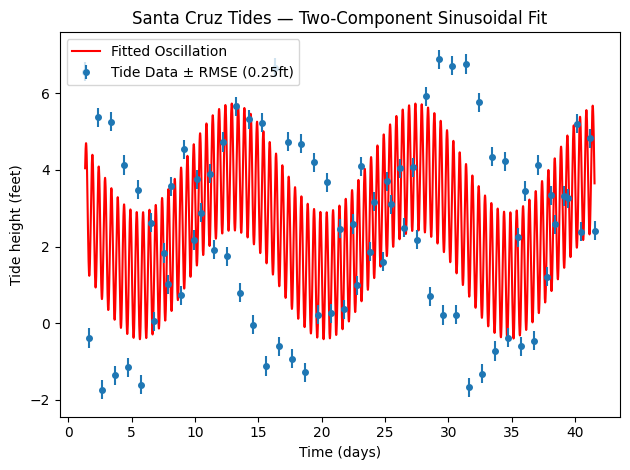

In [62]:
import scipy.optimize as sc

times = np.array(t, dtype=float)
heights = np.array(h, dtype=float)

estimates = [
    3.0,         # A1
    4*np.pi,     # omega1 (12-hour period)
    0.0,         # phi1
    1.0,         # A2 (modulation amplitude)
    2*np.pi/14,  # omega2 (14-day period)
    0.0,         # phi2
    2.5          # C (mean tide height)
]

sigma = np.full_like(heights, 0.25)

parameters, covariance = sc.curve_fit(
    tide_model,
    times,
    heights,
    p0=estimates,
    sigma=sigma,
    absolute_sigma=True,
    maxfev=20000
)

t_fit = np.linspace(min(times), max(times), 5000)
h_fit = tide_model(t_fit, *parameters)

plt.plot(t_fit, h_fit, label = "Fitted Oscillation", color="red")
plt.errorbar(times, heights, yerr=0.25, fmt='o', markersize=4, label="Tide Data ± RMSE (0.25ft)")
plt.xlabel("Time (days)")
plt.ylabel("Tide height (feet)")
plt.title("Santa Cruz Tides — Two-Component Sinusoidal Fit")
plt.legend()
plt.tight_layout()

plt.savefig("TidesPlotWithRMSE.pdf", bbox_inches='tight')
plt.savefig("TidesPlotWithRMSE.png", bbox_inches='tight')
plt.show()